In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import scipy 
from scipy import stats

In [3]:
data = pd.read_csv('/Users/saulrubiofloresvalencia/Downloads/dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
data1 = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','instrumentalness',
             'liveness', 'valence', 'tempo' ]]

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      114000 non-null  float64
 1   energy            114000 non-null  float64
 2   loudness          114000 non-null  float64
 3   speechiness       114000 non-null  float64
 4   acousticness      114000 non-null  float64
 5   instrumentalness  114000 non-null  float64
 6   liveness          114000 non-null  float64
 7   valence           114000 non-null  float64
 8   tempo             114000 non-null  float64
dtypes: float64(9)
memory usage: 7.8 MB


In [7]:
data2 = data1.sample(100)

In [152]:
user1 = data2.sample(n=25)
user2 = data2.sample(n=5)
user3 = data2.sample(n=15)
user4 = data2.sample(n=10)
user5 = data2.sample(n=10)

In [153]:
print(user1)
print(user2)
print(user3)
print(user4)
print(user5)

        danceability  energy  loudness  speechiness  acousticness  \
9701           0.443  0.6850    -6.139       0.0312      0.350000   
26588          0.451  0.0635   -26.904       0.0331      0.629000   
45814          0.711  0.9040    -4.291       0.0313      0.765000   
96191          0.725  0.7660    -9.510       0.0908      0.019600   
76580          0.567  0.6550    -5.271       0.0334      0.165000   
8900           0.576  0.5130    -8.541       0.0323      0.208000   
89070          0.904  0.8170    -3.956       0.0871      0.025400   
73158          0.709  0.8250    -8.218       0.0421      0.008270   
30488          0.712  0.9230    -5.536       0.0727      0.012400   
47910          0.473  0.9730    -3.831       0.1100      0.000250   
67542          0.813  0.7960    -5.545       0.1640      0.156000   
55502          0.367  0.5180    -9.946       0.4640      0.814000   
69473          0.779  0.5390   -13.277       0.1970      0.019600   
58175          0.600  0.9540    -5

In [154]:
users_ = [user1, user2, user3, user4, user5] 
users_


[        danceability  energy  loudness  speechiness  acousticness  \
 9701           0.443  0.6850    -6.139       0.0312      0.350000   
 26588          0.451  0.0635   -26.904       0.0331      0.629000   
 45814          0.711  0.9040    -4.291       0.0313      0.765000   
 96191          0.725  0.7660    -9.510       0.0908      0.019600   
 76580          0.567  0.6550    -5.271       0.0334      0.165000   
 8900           0.576  0.5130    -8.541       0.0323      0.208000   
 89070          0.904  0.8170    -3.956       0.0871      0.025400   
 73158          0.709  0.8250    -8.218       0.0421      0.008270   
 30488          0.712  0.9230    -5.536       0.0727      0.012400   
 47910          0.473  0.9730    -3.831       0.1100      0.000250   
 67542          0.813  0.7960    -5.545       0.1640      0.156000   
 55502          0.367  0.5180    -9.946       0.4640      0.814000   
 69473          0.779  0.5390   -13.277       0.1970      0.019600   
 58175          0.60

In [155]:
users_df =  pd.concat(users_)   

In [156]:
users_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
9701,0.443,0.6850,-6.139,0.0312,0.3500,0.000006,0.1180,0.646,178.935
26588,0.451,0.0635,-26.904,0.0331,0.6290,0.908000,0.1360,0.259,103.290
45814,0.711,0.9040,-4.291,0.0313,0.7650,0.000946,0.2270,0.959,100.131
96191,0.725,0.7660,-9.510,0.0908,0.0196,0.000000,0.0335,0.931,87.984
76580,0.567,0.6550,-5.271,0.0334,0.1650,0.000622,0.1390,0.115,96.007
...,...,...,...,...,...,...,...,...,...
107755,0.787,0.8430,-8.416,0.0408,0.3870,0.000085,0.3000,0.798,110.006
40962,0.582,0.2870,-9.597,0.0361,0.8960,0.000004,0.2120,0.543,82.835
55502,0.367,0.5180,-9.946,0.4640,0.8140,0.071000,0.1600,0.530,98.240
11670,0.384,0.4080,-9.064,0.0278,0.2630,0.000352,0.1270,0.292,79.463


In [157]:
playlist_rec = cosine_similarity(data2)

In [158]:
playlist_recDF = pd.DataFrame(playlist_rec, index=data2.index, 
                             columns=data2.index)




In [159]:
playlist_recDF

,33343,47910,53006,81508,104560,31623,48229,68235,107755,55502,...,74780,65744,97209,102912,67542,96799,103879,55413,99293,28675
33343,1.000000,0.999775,0.999896,0.999144,0.999574,0.999951,0.998711,0.999804,0.999583,0.998545,...,0.999680,0.999963,0.999930,0.994222,0.999939,0.999619,0.998744,0.999822,0.999049,0.999621
47910,0.999775,1.000000,0.999384,0.998090,0.998768,0.999652,0.997437,0.999171,0.998760,0.997233,...,0.999987,0.999669,0.999913,0.991806,0.999492,0.998883,0.997518,0.999246,0.997920,0.999976
53006,0.999896,0.999384,1.000000,0.999610,0.999882,0.999934,0.999314,0.999972,0.999883,0.999195,...,0.999229,0.999917,0.999686,0.995645,0.999984,0.999890,0.999352,0.999966,0.999562,0.999150
81508,0.999144,0.998090,0.999610,1.000000,0.999904,0.999312,0.999920,0.999737,0.999907,0.999890,...,0.997850,0.999327,0.998702,0.997734,0.999524,0.999846,0.999926,0.999729,0.999935,0.997700
104560,0.999574,0.998768,0.999882,0.999904,1.000000,0.999707,0.999743,0.999931,0.999988,0.999682,...,0.998566,0.999688,0.999227,0.996914,0.999815,0.999971,0.999778,0.999928,0.999876,0.998452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96799,0.999619,0.998883,0.999890,0.999846,0.999971,0.999756,0.999631,0.999918,0.999954,0.999590,...,0.998694,0.999732,0.999340,0.996670,0.999825,1.000000,0.999697,0.999936,0.999777,0.998607
103879,0.998744,0.997518,0.999352,0.999926,0.999778,0.999007,0.999958,0.999495,0.999752,0.999979,...,0.997232,0.998954,0.998193,0.998337,0.999204,0.999697,1.000000,0.999476,0.999945,0.997084
55413,0.999822,0.999246,0.999966,0.999729,0.999928,0.999888,0.999436,0.999962,0.999922,0.999351,...,0.999092,0.999903,0.999593,0.995975,0.999948,0.999936,0.999476,1.000000,0.999630,0.998993
99293,0.999049,0.997920,0.999562,0.999935,0.999876,0.999227,0.999953,0.999692,0.999878,0.999906,...,0.997653,0.999190,0.998533,0.997923,0.999445,0.999777,0.999945,0.999630,1.000000,0.997504


<AxesSubplot:>

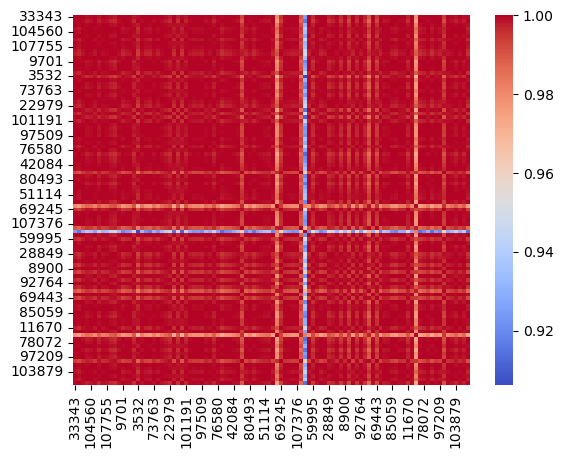

In [160]:
sns.heatmap(data=playlist_recDF, cmap='coolwarm')

In [161]:
base_song = stats.mode(users_df.index)
base_song


/var/folders/x8/3h7vj_g13ybgs_gdkdjjq4nw0000gn/T/ipykernel_37235/2600523641.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  base_song = stats.mode(users_df.index)


ModeResult(mode=array([106219]), count=array([3]))

In [162]:
playlist_base = playlist_recDF.loc[106219]

In [163]:
playlist =pd.DataFrame( playlist_base.sort_values(ascending = False) )
indices=list(playlist[:20].index)
indices

[106219,
 92764,
 65744,
 49241,
 103964,
 66877,
 36560,
 31623,
 80493,
 76580,
 33343,
 28305,
 107376,
 100762,
 12596,
 67542,
 30488,
 31141,
 83557,
 97509]

In [164]:
data.iloc[indices]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
106219,106219,43Hit5V2BpPq2vxvca3ysc,Sandro Cavazza,Lean On Me,Lean On Me,67,182497,False,0.799,0.419,...,-7.990,1,0.1740,0.41200,0.000000,0.2030,0.716,156.055,4,swedish
92764,92764,3BKdVJ65d6MMJdWD6x3GbQ,BOØWY,BEAT EMOTION,OUR REVOLUTION,25,232933,False,0.602,0.735,...,-7.152,1,0.0371,0.07800,0.006660,0.0746,0.744,139.409,4,rockabilly
65744,65744,7CCGHQ9FNc6Ejh9nhy8bGh,Anuradha Paudwal,Shiv Amritwani,Shiv Amritwani,47,2957840,False,0.598,0.623,...,-7.399,0,0.0817,0.81700,0.000000,0.0538,0.935,143.031,4,k-pop
49241,49241,0Q7rV5NEoIXQ4IesaaNp8a,PartyfrieX,Partyfreak,Ik Heb Gezopen - Hardstyle Remix,28,157360,False,0.656,0.823,...,-7.363,1,0.0435,0.00426,0.000001,0.1420,0.538,147.966,4,hardstyle
103964,103964,3xZuqolTh1AtTyXnrjy8NW,Pink Sweat$;6LACK,Pink Moon,Midnight River (feat. 6LACK),55,184771,False,0.497,0.351,...,-9.048,0,0.0648,0.77700,0.000000,0.1670,0.234,171.719,4,soul
66877,66877,0qxYVSNJOnsUpqnxUJMdav,That Girl Lay Lay,Tha Cheat Code,Cheat Code,8,113859,False,0.881,0.698,...,-6.102,1,0.0539,0.17200,0.000000,0.1040,0.311,126.996,4,kids
36560,36560,7KkdYJqxvq4ZFq9gvFy06v,Ottawan,D.I.S.C.O.,D.I.S.C.O. - Single Version,57,196506,False,0.714,0.867,...,-6.295,0,0.0569,0.11000,0.000090,0.3250,0.872,122.915,4,french
31623,31623,5EbX5xL3O2xT8FxCpYzgUO,Alessia Cara,"How Far I'll Go (From ""Moana"")","How Far I'll Go - From ""Moana""",66,175517,False,0.309,0.544,...,-9.621,1,0.3520,0.15500,0.000265,0.0727,0.160,180.979,4,electro
80493,80493,0tgwvpBXcw7GURJRqBnc4g,Meet Bros.;Roach Killa;Khushboo Grewal;Arijit ...,Best Of Arijit Singh - Revisited,"Girl I Need You (From ""Baaghi"")",61,297752,False,0.647,0.537,...,-7.486,1,0.0258,0.36800,0.000000,0.2130,0.185,131.927,4,pop-film
76580,76580,7xRsb56KyeYBAQynelcOlt,Tarja,What Lies Beneath,In for a Kill,23,281133,False,0.567,0.655,...,-5.271,1,0.0334,0.16500,0.000622,0.1390,0.115,96.007,4,opera
